In [ ]:
#Technical Analysis Systems (Apostolos Dasilas)
#Taouktsis Xenofon (dai19312)
#Υπολογισμοί του SMA και WMA και EMA
#Δεδομένα από το [investing.com]
#Τα δεδομένα (.csv) όπως τα κατεβάζουμε απευθείας από το investing.com
#Το αρχείο θα έχει όνομα συμβόλου και μετατροπή από π.χ. ETH.csv σε ETH_md.csv
#UPDATE 111220 - v7

**Εισαγωγή Libraries και Functions**

In [1]:
#Βήμα 1 | Libraries Input
from google.colab import files
import pandas as pd
import numpy as np
import numpy as np, numpy.random
import matplotlib.pyplot as plt
import re
import matplotlib.dates as mdates

In [2]:
#Βήμα 2 | Upload Dataset Function
def upload_dataset():
    data_upload = files.upload()
    filename = list(data_upload.keys())[0]
    filename = re.sub(".csv", "", filename)
    return filename

In [3]:
#Βήμα 3 | Signal to Buy or to Sell Report Function
def signal_buy_sell_report(dataset,DATA_B):
        DATA_A = pd.DataFrame(dataset['Price'])
        signal_buy = []
        signal_sell = []
        id = -1
        for i in range(len(dataset)):
            if DATA_A.iloc[:,0][i] > DATA_B.iloc[:,0][i]:
                if id != 1:
                    signal_buy.append(dataset['Price'][i])
                    signal_sell.append(np.nan)
                    id = 1
                else:
                    signal_buy.append(np.nan)
                    signal_sell.append(np.nan)
            elif  DATA_A.iloc[:,0][i] < DATA_B.iloc[:,0][i]:
                if id !=0:
                    signal_buy.append(np.nan)
                    signal_sell.append(dataset['Price'][i])
                    id = 0
                else:
                    signal_buy.append(np.nan)
                    signal_sell.append(np.nan)
            else:
                signal_buy.append(np.nan)
                signal_sell.append(np.nan)
        ###
        report_buy_sell = pd.DataFrame()
        report_buy_sell['Date'] = dataset.iloc[:,0]
        report_buy_sell['signal_buy_price'] = signal_buy
        report_buy_sell['signal_sell_price'] = signal_sell
        ###

        dates_to_buy = report_buy_sell.loc[report_buy_sell['signal_buy_price']>0]
        dates_to_buy = dates_to_buy.drop(dates_to_buy.columns[2],axis=1)

        dates_to_sell = report_buy_sell.loc[report_buy_sell['signal_sell_price']>0]
        dates_to_sell = dates_to_sell.drop(dates_to_sell.columns[1],axis=1)

        dates_buy_sell = pd.concat([dates_to_buy, dates_to_sell])
        dates_buy_sell.sort_index(inplace=True)
        drop_index = dates_buy_sell.index.tolist()[0]
        dates_buy_sell.set_index('Date', inplace = True)
        drop_index_date = dates_buy_sell.index.tolist()[0]
        dates_buy_sell = dates_buy_sell.drop([drop_index_date],axis=0)
        report_buy_sell.iloc[drop_index,1:] = np.nan

        return (report_buy_sell, dates_buy_sell)

In [4]:
#Βήμα 4 | Plot Total Signal Report
def plot_total_signals(data_input,total_dates_report):
    symbol_name = re.sub("_md", "", filename)

    data_input_label = re.sub("Price_", "", data_input.columns[0])

    resize_figure = plt.figure(figsize=(18,12))
    start_date = dataset['Date'].iloc[0]
    end_date = dataset['Date'].iloc[-1]

    plt.plot(dataset['Price'], label = symbol_name, alpha = 0.80, color = 'violet')
    plt.plot(data_input.iloc[:,0], label = data_input_label, alpha = 0.80,  color = 'red')

    plt.scatter(total_dates_report.index, total_dates_report['signal_buy_price'],label = 'Buy',marker = '^', color = 'forestgreen')
    plt.scatter(total_dates_report.index, total_dates_report['signal_sell_price'], label = 'Sell', marker = 'v', color = 'black')

    plt.title('Buy and Sell Signals | Symbol: ' + symbol_name + ' [Price History]')
    plt.xlabel('{} to {}'.format(start_date, end_date))
    plt.ylabel('Price USD')
    plt.legend()
    return plt.show()

In [5]:
#Βήμα 5 | Plot Compare Between Datasets (example SMA30 with WMA30 with EMA30)
def plot_compare_report (DATA_A,DATA_B,DATA_C):
    symbol_name = re.sub("_md", "", filename)
    DATA_A_label = re.sub("Price_", "", DATA_A.columns[0])
    DATA_B_label = re.sub("Price_", "", DATA_B.columns[0])
    DATA_C_label = re.sub("Price_", "", DATA_C.columns[0])

    resize_figure = plt.figure(figsize=(18,10))
    start_date = dataset['Date'].iloc[0]
    end_date = dataset['Date'].iloc[-1]

    plt.plot(dataset['Price'], label = symbol_name, alpha = 0.50)
    plt.plot(DATA_A.iloc[:,0], label = DATA_A_label, alpha = 1)
    plt.plot(DATA_B.iloc[:,0], label = DATA_B_label, alpha = 1)
    plt.plot(DATA_C.iloc[:,0], label = DATA_C_label, alpha = 1)

    plt.title('Compare Results: ' + DATA_A_label + ', '+ DATA_B_label +' and ' + DATA_C_label + ' | Symbol: ' + symbol_name + ' [Price History]')
    plt.xlabel('{} to {}'.format(start_date, end_date))
    plt.ylabel('Price USD')
    plt.legend()
    return plt.show()

**Απευθείας CSV to CSV_md - INVESTING.COM**

In [6]:
#Βήμα SOS
#Direct CSV to CSV_md (investing.com)
def md_csv_dataset(filename):
    chart = pd.read_csv(filename+".csv",
                        sep = ',')
    n_col = len(chart.columns)
    chart = chart.drop(chart.columns[n_col-1],axis=1)

    if len(chart.columns) < 6 :
        chart['Volume'] = 0
        id = 1
    else :
        id = 0

    chart.columns = ['Date','Price',
                    'Open','High',
                    'Low','Volume']

    #Μορφή Ημερομηνίας
    chart.Date = pd.to_datetime(chart.Date).dt.strftime('%m-%d-%Y')

    chart = chart.replace(',','', regex=True)
    chart = chart.replace('%','', regex=True)
    chart.iloc[:,1:6] = chart.iloc[:,1:6].replace('-','0', regex=True)

    chart['Date'] = chart['Date'].astype(np.datetime64)
    chart['Date'] = chart['Date'].dt.date
    chart['Price'] = chart['Price'].astype(np.float64)
    chart['Open'] = chart['Open'].astype(np.float64)
    chart['High'] = chart['High'].astype(np.float64)
    chart['Low'] = chart['Low'].astype(np.float64)

    if id!=1:
        for i in range(len(chart)):
            tmp_value = chart.iloc[i,5]
            if tmp_value != re.sub("K", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("K", "",tmp_value)) * 1000
            elif tmp_value != re.sub("M", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("M", "",tmp_value)) * 1000000
            elif  tmp_value != re.sub("B", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("B", "",tmp_value)) * 1000000000
        chart['Volume'] = chart['Volume'].astype(np.float64)
    else:
        #update 111220
        chart['Volume'] = 0 #Υπήρχε θέμα με το volume οπότε το θέτω με μηδέν ( 0 ) όταν δεν υπάρχει η στήλη από το investing.com
        #md_col = len(chart.columns)
        #chart = chart.drop(chart.columns[md_col-1],axis=1)

    chart.sort_values(by=['Date'], inplace=True, ascending=True)

    #update 081220
    chart.index = range(len(chart['Date']))

    return chart

**01 - Εισαγωγή των δεδομένων μας**

In [7]:
#Βήμα 1 | Upload .csv Dataset (.csv)
filename = upload_dataset()
filename
#Το αποτέλεσμα θα είναι π.χ. filename = "AAPL"

Saving INTC Ιστορικά Δεδομένα.csv to INTC Ιστορικά Δεδομένα.csv


'INTC Ιστορικά Δεδομένα'

In [8]:
 #Βήμα 2 | Creation of Dataset (load .csv file)
#Επιλογές Υποδιαστολής
#American xlsx επιλογή decimal_select = '.' εάν το csv έχει αποθηκευτεί με ( . )
#European xlsx επιλογή decimal_select = ',' εάν το csv έχει αποθηκευτεί με ( , )

#Επιλογή Διαχωρισμού Στηλών
#European xlsx sep_select = ';' εάν το csv έχει αποθηκευτεί με ( ; )
#American xlsx sep_select = ',' εάν το csv έχει αποθηκευτεί με ( , )

#decimal_select = ',' #Υποδιαστολή
#sep_select = ';' #Διαχωρισμός Στηλών

dataset = md_csv_dataset(filename)
dataset

<ipython-input-6-c48ecfe65363>:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  chart.Date = pd.to_datetime(chart.Date).dt.strftime('%m-%d-%Y')


Date   Price    Open    High     Low        Volume
0    2022-01-11  2830.0  2880.0  2885.0  2789.0  4.442000e+09
1    2022-01-12  2983.0  3024.0  3048.0  2952.0  3.890000e+09
2    2022-02-11  2742.0  2827.0  2885.0  2741.0  5.196000e+09
3    2022-02-12  2941.0  2917.0  2943.0  2871.0  3.155000e+09
4    2022-03-11  2739.0  2745.0  2788.0  2717.0  3.968000e+09
..          ...     ...     ...     ...     ...           ...
247  2023-12-05  2895.0  2902.0  2910.0  2872.0  2.415000e+09
248  2023-12-06  3307.0  3140.0  3330.0  3136.0  5.967000e+09
249  2023-12-07  3398.0  3369.0  3408.0  3306.0  3.728000e+09
250  2023-12-09  3886.0  3865.0  4007.0  3865.0  5.465000e+09
251  2023-12-10  3684.0  3680.0  3722.0  3639.0  2.356000e+09

[252 rows x 6 columns]

**02 - Συναρτήσεις και Διαδικασίες για υπολογισμό του SMA**

In [9]:
#Βήμα 1 | Simple SMA with Plot Function
def sma_info(dataset, window_value):
  tmp_sma = pd.DataFrame()
  tmp_sma['Price'] = dataset['Price'].rolling(window=window_value).mean()
  tmp_sma.columns = ['Price'+'_SMA'+ str(window_value)]
  plt.plot(tmp_sma)
  plt.plot(dataset['Price'])
  plt.show()
  return tmp_sma

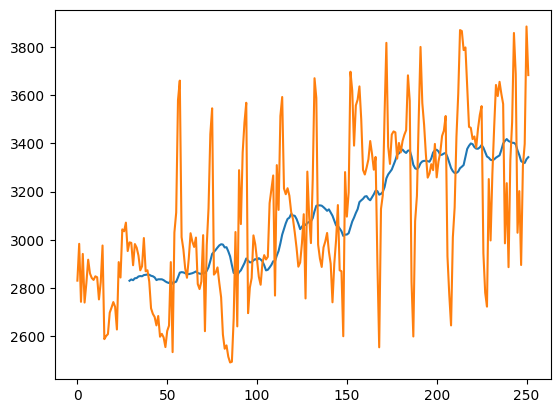

Price_SMA30
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
..           ...
247  3326.633333
248  3321.233333
249  3319.000000
250  3334.600000
251  3343.100000

[252 rows x 1 columns]

In [10]:
#Βήμα 2 | Select SMA window to calculate (example 1)
window_value = 30
SMA_A = sma_info(dataset, window_value)
SMA_A

In [11]:
#Βήμα 3 | Total Date Signals (Buy or to Sell) SMA_A Report
SMA_A_total_dates_report , SMA_A_signals = signal_buy_sell_report(dataset,SMA_A)
SMA_A_signals

signal_buy_price  signal_sell_price
Date                                           
2022-12-14               NaN             2826.0
2023-01-02            2907.0                NaN
2023-01-03               NaN             2533.0
2023-01-05            3030.0                NaN
2023-01-19               NaN             2842.0
2023-01-20            2922.0                NaN
2023-01-27               NaN             2816.0
2023-02-02            3019.0                NaN
2023-02-03               NaN             2620.0
2023-02-05            2977.0                NaN
2023-02-13               NaN             2855.0
2023-03-02            3032.0                NaN
2023-03-03               NaN             2640.0
2023-03-04            3289.0                NaN
2023-03-13               NaN             2695.0
2023-03-16            3018.0                NaN
2023-03-21               NaN             2846.0
2023-03-24            2936.0                NaN
2023-04-01               NaN             2768.0
2023-04-04            3310.0                NaN
2023-04-20               NaN             3086.0
2023-04-28            3106.0                NaN
2023-05-01               NaN             2756.0
2023-05-04            3283.0                NaN
2023-05-06               NaN             2986.0
2023-05-07            3251.0                NaN
2023-05-15               NaN             2980.0
2023-05-31            3144.0                NaN
2023-06-01               NaN             2873.0
2023-06-04            3281.0                NaN
2023-07-02               NaN             2905.0
2023-07-08            3523.0                NaN
2023-07-20               NaN             3337.0
2023-07-21            3402.0                NaN
2023-07-24               NaN             3363.0
2023-07-25            3410.0                NaN
2023-08-02               NaN             2824.0
2023-08-08            3502.0                NaN
2023-08-17               NaN             3258.0
2023-08-23            3398.0                NaN
2023-08-24               NaN             3259.0
2023-08-28            3362.0                NaN
2023-09-01               NaN             2931.0
2023-09-08            3428.0                NaN
2023-10-01               NaN             2944.0
2023-10-08            3468.0                NaN
2023-11-01               NaN             2985.0
2023-11-08            3489.0                NaN
2023-12-01               NaN             3029.0
2023-12-07            3398.0                NaN

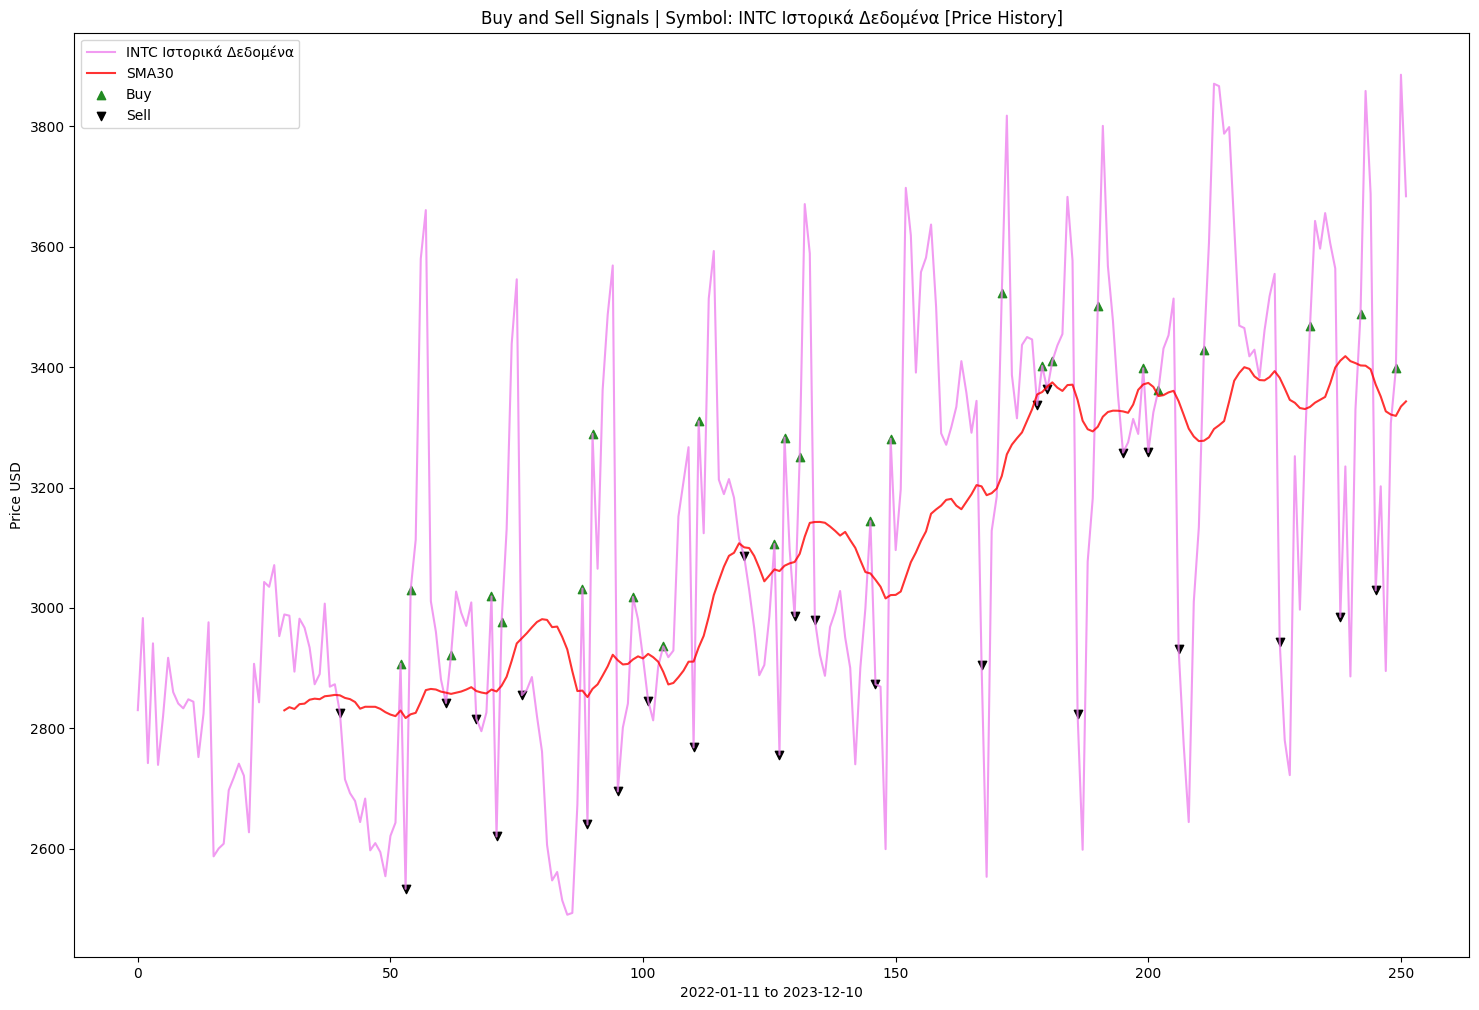

In [12]:
#Βήμα 4 | SMA_A Plot Report: Total Date Signals (Buy or to Sell)
plot_total_signals(SMA_A,SMA_A_total_dates_report)

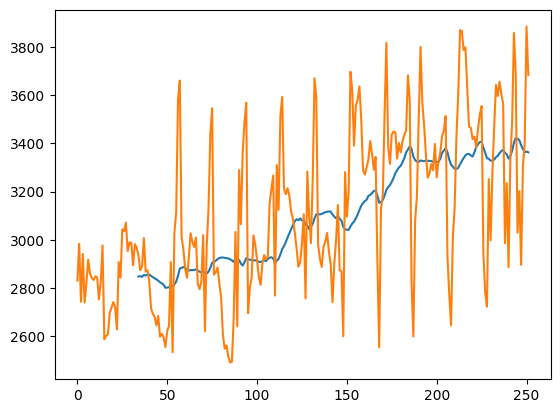

Price_SMA35
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
..           ...
247  3393.085714
248  3376.971429
249  3363.571429
250  3366.371429
251  3363.085714

[252 rows x 1 columns]

In [13]:
#Βήμα 5 | Select SMA window to calculate (example 2)
window_value = 35
SMA_B = sma_info(dataset, window_value)
SMA_B

In [14]:
#Βήμα 6 | Total Date Signals (Buy or to Sell) SMA_B Report
SMA_B_total_dates_report , SMA_B_signals = signal_buy_sell_report(dataset,SMA_B)
SMA_B_signals

signal_buy_price  signal_sell_price
Date                                           
2022-12-14               NaN             2826.0
2023-01-02            2907.0                NaN
2023-01-03               NaN             2533.0
2023-01-05            3030.0                NaN
2023-01-18               NaN             2881.0
2023-01-20            2922.0                NaN
2023-01-27               NaN             2816.0
2023-02-02            3019.0                NaN
2023-02-03               NaN             2620.0
2023-02-05            2977.0                NaN
2023-02-13               NaN             2855.0
2023-03-02            3032.0                NaN
2023-03-03               NaN             2640.0
2023-03-04            3289.0                NaN
2023-03-13               NaN             2695.0
2023-03-16            3018.0                NaN
2023-03-21               NaN             2846.0
2023-03-24            2936.0                NaN
2023-04-01               NaN             2768.0
2023-04-04            3310.0                NaN
2023-04-21               NaN             3030.0
2023-04-28            3106.0                NaN
2023-05-01               NaN             2756.0
2023-05-04            3283.0                NaN
2023-05-06               NaN             2986.0
2023-05-07            3251.0                NaN
2023-05-15               NaN             2980.0
2023-05-31            3144.0                NaN
2023-06-01               NaN             2873.0
2023-06-04            3281.0                NaN
2023-07-02               NaN             2905.0
2023-07-07            3185.0                NaN
2023-08-02               NaN             2824.0
2023-08-08            3502.0                NaN
2023-08-17               NaN             3258.0
2023-08-23            3398.0                NaN
2023-08-24               NaN             3259.0
2023-08-25            3325.0                NaN
2023-09-01               NaN             2931.0
2023-09-08            3428.0                NaN
2023-09-26               NaN             3383.0
2023-09-27            3461.0                NaN
2023-10-01               NaN             2944.0
2023-10-08            3468.0                NaN
2023-11-01               NaN             2985.0
2023-11-08            3489.0                NaN
2023-12-01               NaN             3029.0
2023-12-07            3398.0                NaN

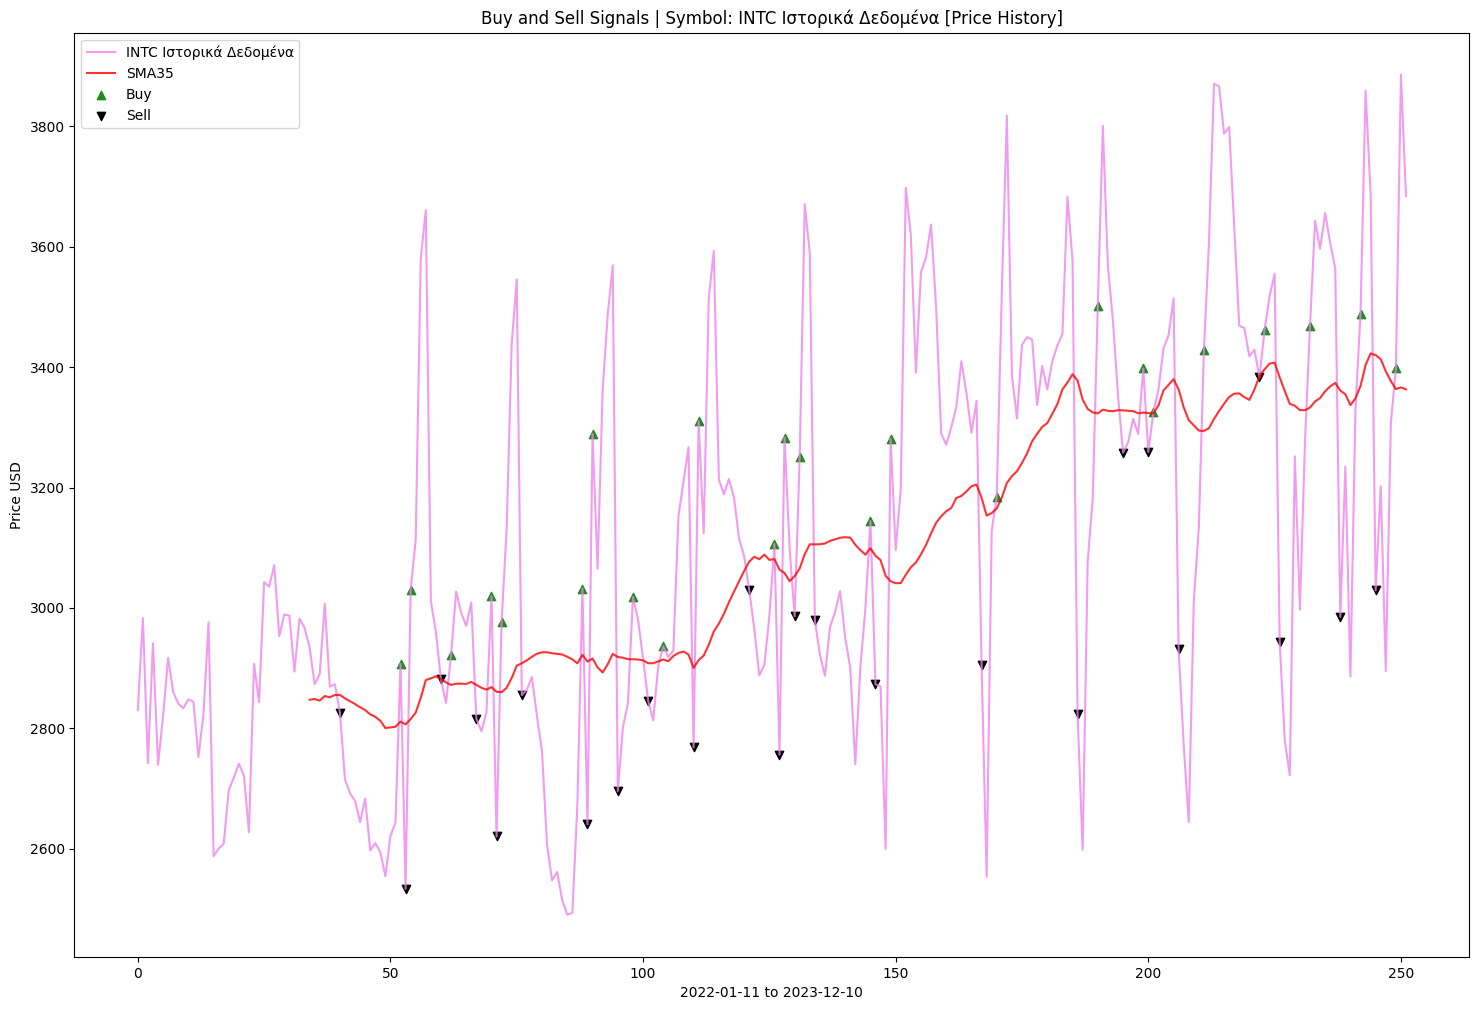

In [15]:
#Βήμα 7 | SMA_B Plot Report: Total Date Signals (Buy or to Sell)
plot_total_signals(SMA_B,SMA_B_total_dates_report)

**03 - Συναρτήσεις και Διαδικασίες για υπολογισμό του WMA**




In [16]:
#Βήμα 1 | Generate Weights
def generate_weights (window_value):
  s = 1
  #weights = np.arange(1,window_value+1) #τα βάρη από τιμή 1 έως το πλήθος του window
  weights = np.round(np.random.dirichlet(np.ones(window_value))*s,3)
  weights.sort()
  #weights[::-1].sort()
  return weights

In [17]:
#Βήμα 2 | WMA with Plot Function
def wma_info(dataset, window_value):
  input_weights = generate_weights(window_value)
  sum_input_weights = np.sum(input_weights)
  tmp_wma = pd.DataFrame()
  tmp_wma['Price'] = (dataset['Price']
    .rolling(window = window_value, center=False)
    .apply(lambda x: np.sum(input_weights*x) / sum_input_weights, raw=False)
    )
  tmp_wma.columns = ['Price'+'_WMA'+ str(window_value)]
  plt.plot(tmp_wma)
  plt.plot(dataset['Price'])
  plt.show()
  return tmp_wma

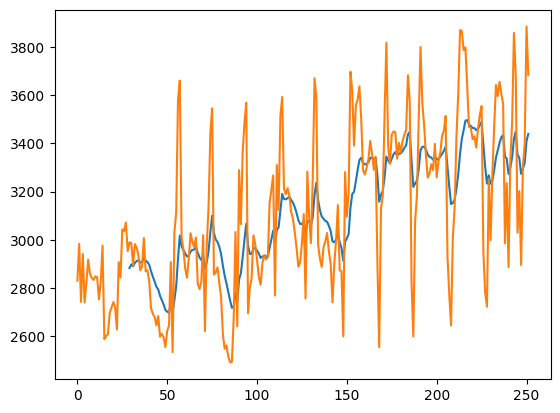

Price_WMA30
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
..           ...
247  3273.629630
248  3296.147147
249  3318.579580
250  3410.022022
251  3439.516517

[252 rows x 1 columns]

In [18]:
#Βήμα 3 | Select WMA window to calculate (example 1)
window_value = 30
WMA_A = wma_info(dataset, window_value)
WMA_A

In [19]:
#Βήμα 4 | Total Date Signals (Buy or to Sell) WMA_A Report
WMA_A_total_dates_report , WMA_A_signals_dates = signal_buy_sell_report(dataset,WMA_A)
WMA_A_signals_dates

signal_buy_price  signal_sell_price
Date                                           
2022-11-28               NaN             2873.0
2022-11-30            3007.0                NaN
2022-12-12               NaN             2869.0
2023-01-02            2907.0                NaN
2023-01-03               NaN             2533.0
2023-01-05            3030.0                NaN
2023-01-18               NaN             2881.0
2023-01-23            3027.0                NaN
2023-01-27               NaN             2816.0
2023-02-02            3019.0                NaN
2023-02-03               NaN             2620.0
2023-02-05            2977.0                NaN
2023-02-13               NaN             2855.0
2023-03-02            3032.0                NaN
2023-03-03               NaN             2640.0
2023-03-04            3289.0                NaN
2023-03-13               NaN             2695.0
2023-03-16            3018.0                NaN
2023-03-20               NaN             2916.0
2023-03-24            2936.0                NaN
2023-03-27               NaN             2918.0
2023-03-28            2929.0                NaN
2023-04-01               NaN             2768.0
2023-04-04            3310.0                NaN
2023-04-19               NaN             3115.0
2023-04-28            3106.0                NaN
2023-05-01               NaN             2756.0
2023-05-04            3283.0                NaN
2023-05-06               NaN             2986.0
2023-05-07            3251.0                NaN
2023-05-15               NaN             2980.0
2023-05-31            3144.0                NaN
2023-06-01               NaN             2873.0
2023-06-04            3281.0                NaN
2023-06-21               NaN             3290.0
2023-06-26            3334.0                NaN
2023-06-29               NaN             3291.0
2023-06-30            3344.0                NaN
2023-07-02               NaN             2905.0
2023-07-08            3523.0                NaN
2023-07-14               NaN             3315.0
2023-07-17            3437.0                NaN
2023-07-20               NaN             3337.0
2023-07-21            3402.0                NaN
2023-08-02               NaN             2824.0
2023-08-08            3502.0                NaN
2023-08-16               NaN             3353.0
2023-08-23            3398.0                NaN
2023-08-24               NaN             3259.0
2023-08-28            3362.0                NaN
2023-09-01               NaN             2931.0
2023-09-08            3428.0                NaN
2023-09-20               NaN             3469.0
2023-09-28            3518.0                NaN
2023-10-01               NaN             2944.0
2023-10-07            3274.0                NaN
2023-11-01               NaN             2985.0
2023-11-07            3330.0                NaN
2023-12-01               NaN             3029.0
2023-12-06            3307.0                NaN

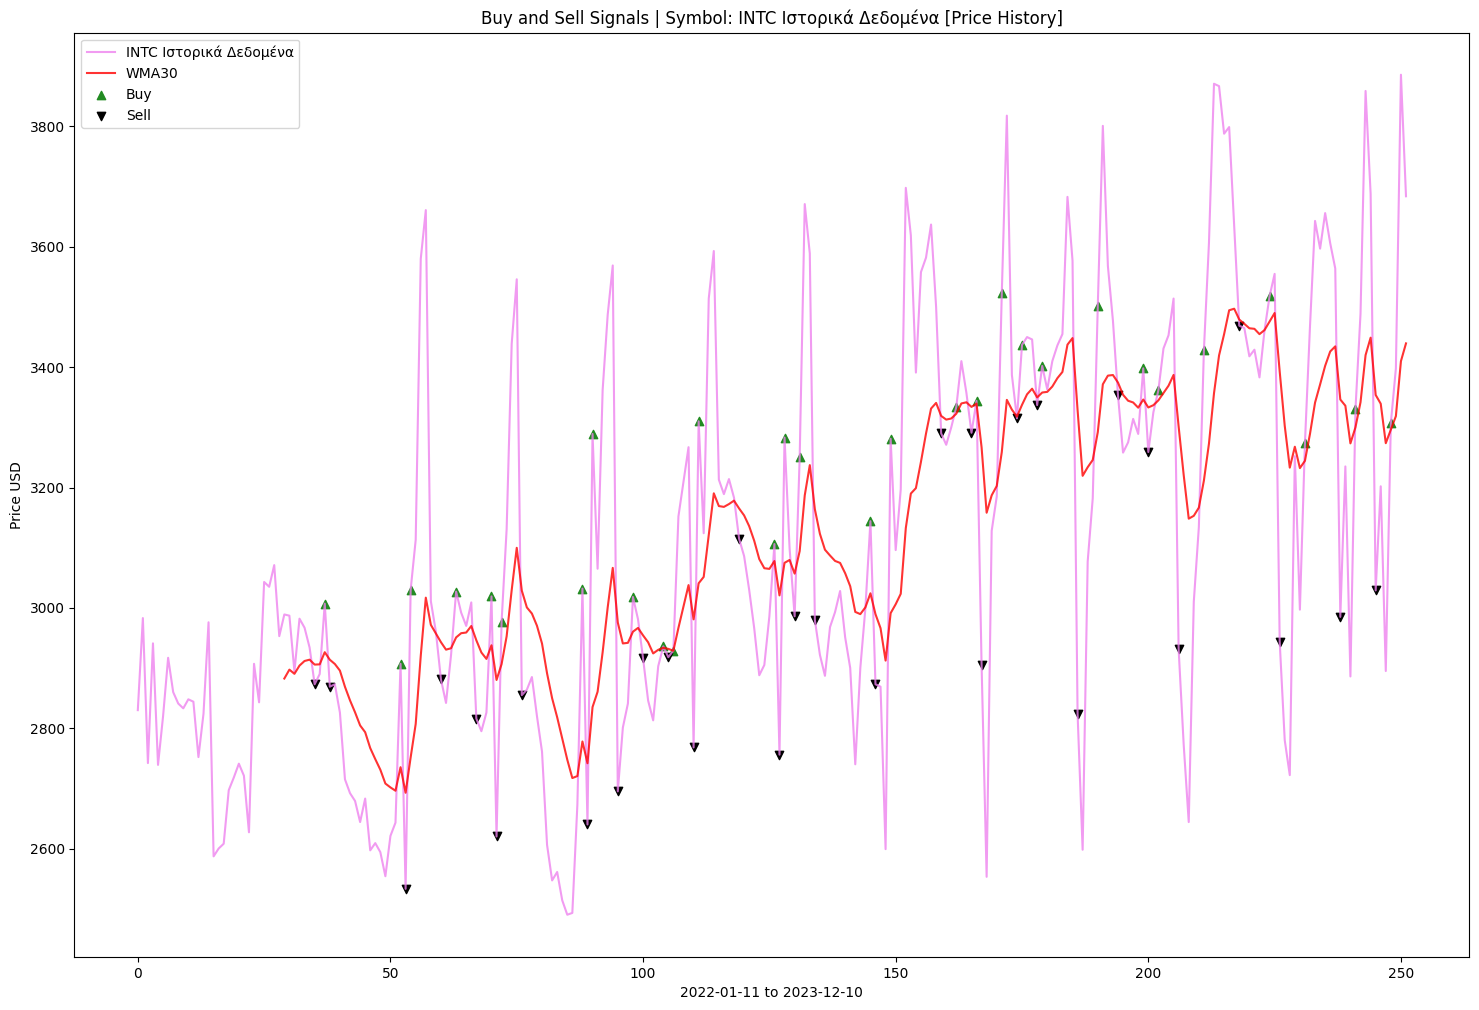

In [20]:
#Βήμα 5 | WMA_A Plot Report: Total Date Signals (Buy or to Sell)
plot_total_signals(WMA_A,WMA_A_total_dates_report)

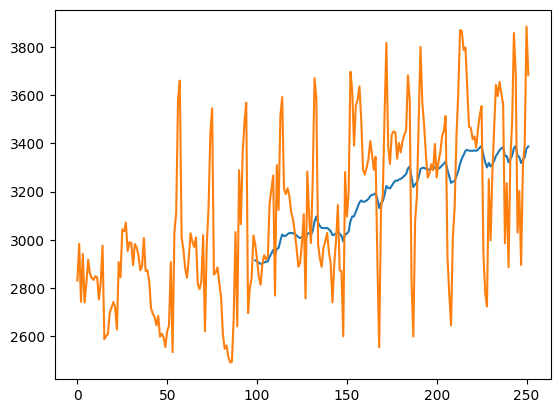

Price_WMA100
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
..            ...
247      3318.995
248      3332.390
249      3342.482
250      3379.509
251      3387.251

[252 rows x 1 columns]

In [21]:
#Βήμα 6 | Select WMA window to calculate (example 2)
window_value = 100
WMA_B = wma_info(dataset, window_value)
WMA_B

In [22]:
#Βήμα 7 | Total Date Signals (Buy or to Sell) WMA_B Report
WMA_B_total_dates_report , WMA_B_signals_dates = signal_buy_sell_report(dataset,WMA_B)
WMA_B_signals_dates

signal_buy_price  signal_sell_price
Date                                           
2023-03-21               NaN             2846.0
2023-03-23            2903.0                NaN
2023-04-01               NaN             2768.0
2023-04-04            3310.0                NaN
2023-04-24               NaN             2966.0
2023-04-28            3106.0                NaN
2023-05-01               NaN             2756.0
2023-05-04            3283.0                NaN
2023-05-06               NaN             2986.0
2023-05-07            3251.0                NaN
2023-05-15               NaN             2980.0
2023-05-31            3144.0                NaN
2023-06-01               NaN             2873.0
2023-06-04            3281.0                NaN
2023-07-02               NaN             2905.0
2023-07-07            3185.0                NaN
2023-08-02               NaN             2824.0
2023-08-08            3502.0                NaN
2023-08-17               NaN             3258.0
2023-08-21            3314.0                NaN
2023-08-22               NaN             3289.0
2023-08-23            3398.0                NaN
2023-08-24               NaN             3259.0
2023-08-25            3325.0                NaN
2023-09-01               NaN             2931.0
2023-09-08            3428.0                NaN
2023-10-01               NaN             2944.0
2023-10-08            3468.0                NaN
2023-11-01               NaN             2985.0
2023-11-08            3489.0                NaN
2023-12-01               NaN             3029.0
2023-12-07            3398.0                NaN

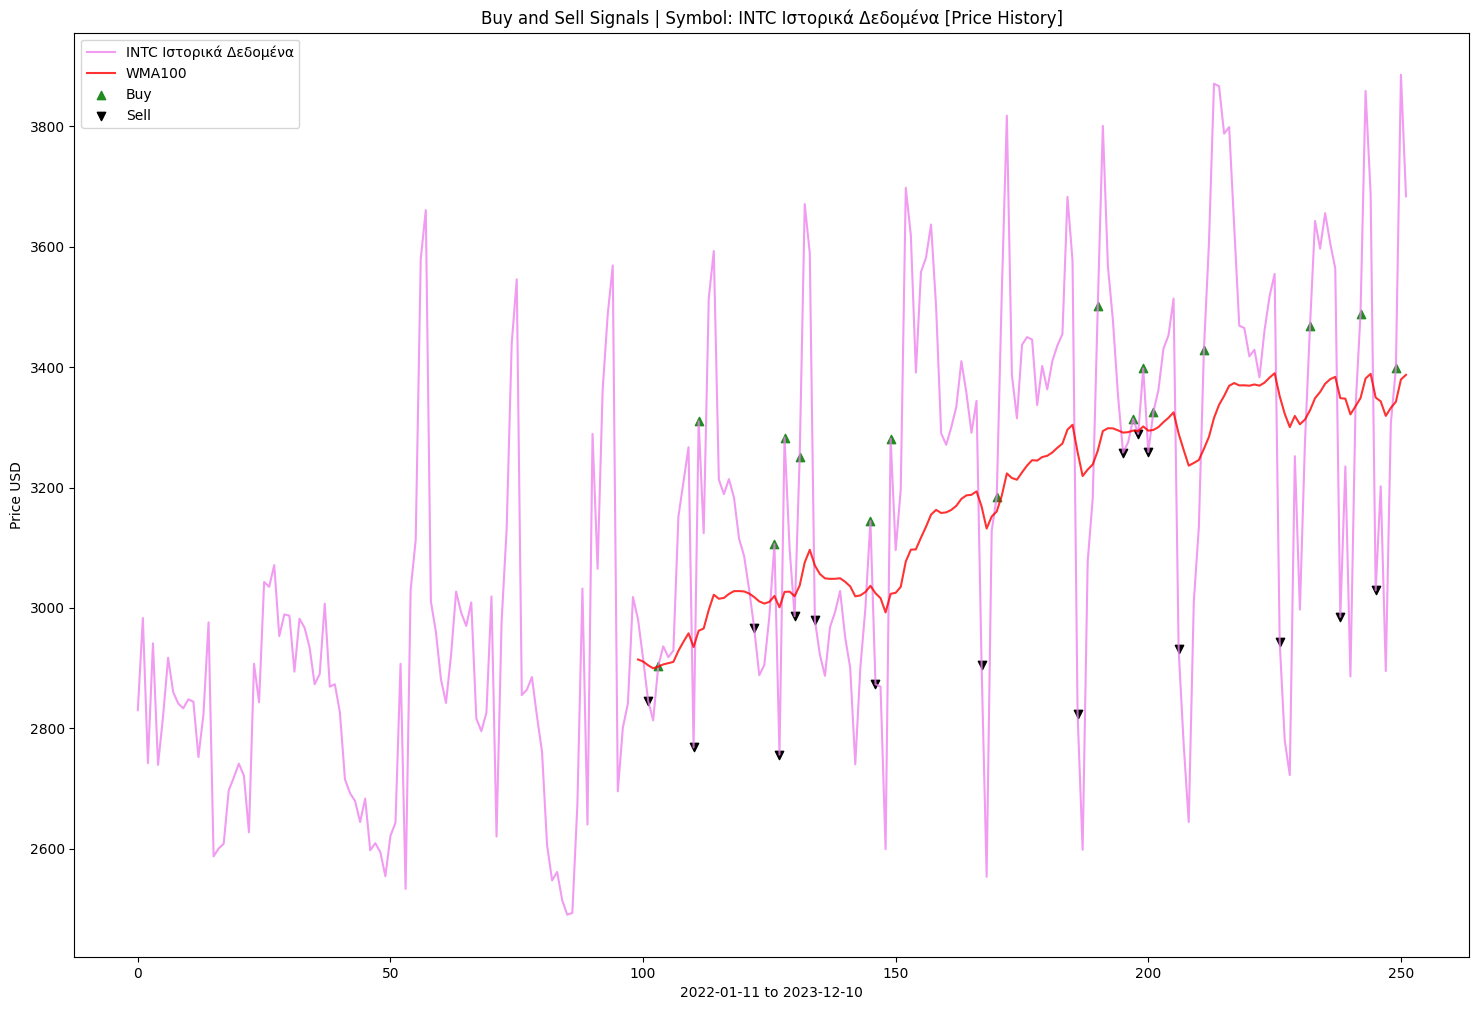

In [23]:
#Βήμα 8 | WMA_B Plot Report: Total Date Signals (Buy or to Sell)
plot_total_signals(WMA_B,WMA_B_total_dates_report)

**04 - Συναρτήσεις και Διαδικασίες για υπολογισμό του EMA**

In [24]:
#Βήμα 1 | EMA with Plot Function
def ema_info(dataset, span_value):
  tmp_sma = pd.DataFrame()
  tmp_sma['Price'] = dataset['Price'].rolling(window=span_value).mean()
  tmp_dataset = pd.DataFrame(dataset.iloc[:,1])
  tmp_ema = pd.DataFrame()
  tmp_price = pd.DataFrame(dataset['Price'])
  tmp_ema = tmp_sma + (2/span_value)*(tmp_price-tmp_sma)
  tmp_ema.columns = ['Price'+'_EMA'+ str(span_value)]
  plt.plot(tmp_ema)
  plt.plot(tmp_dataset['Price'])
  plt.show()
  return tmp_ema

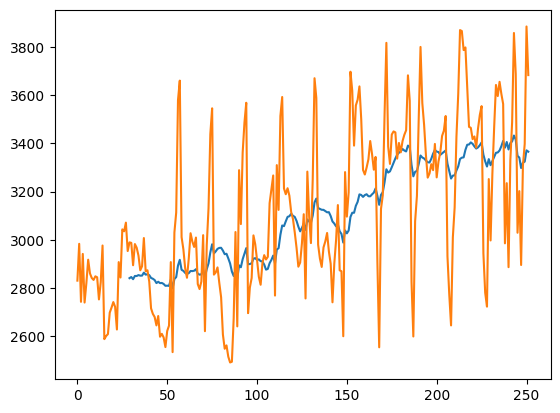

Price_EMA30
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
..           ...
247  3297.857778
248  3320.284444
249  3324.266667
250  3371.360000
251  3365.826667

[252 rows x 1 columns]

In [25]:
#Βήμα 2 | Select EMA Span to calculate (example 1)
span_value = 30
EMA_A = ema_info(dataset, span_value)
EMA_A

In [26]:
#Βήμα 3 | Total Date Signals (Buy or to Sell) EMA_A Report
EMA_A_total_dates_report, EMA_A_signals_dates = signal_buy_sell_report(dataset,EMA_A)
EMA_A_signals_dates

signal_buy_price  signal_sell_price
Date                                           
2022-12-14               NaN             2826.0
2023-01-02            2907.0                NaN
2023-01-03               NaN             2533.0
2023-01-05            3030.0                NaN
2023-01-19               NaN             2842.0
2023-01-20            2922.0                NaN
2023-01-27               NaN             2816.0
2023-02-02            3019.0                NaN
2023-02-03               NaN             2620.0
2023-02-05            2977.0                NaN
2023-02-13               NaN             2855.0
2023-03-02            3032.0                NaN
2023-03-03               NaN             2640.0
2023-03-04            3289.0                NaN
2023-03-13               NaN             2695.0
2023-03-16            3018.0                NaN
2023-03-21               NaN             2846.0
2023-03-24            2936.0                NaN
2023-04-01               NaN             2768.0
2023-04-04            3310.0                NaN
2023-04-20               NaN             3086.0
2023-04-28            3106.0                NaN
2023-05-01               NaN             2756.0
2023-05-04            3283.0                NaN
2023-05-06               NaN             2986.0
2023-05-07            3251.0                NaN
2023-05-15               NaN             2980.0
2023-05-31            3144.0                NaN
2023-06-01               NaN             2873.0
2023-06-04            3281.0                NaN
2023-07-02               NaN             2905.0
2023-07-08            3523.0                NaN
2023-07-20               NaN             3337.0
2023-07-21            3402.0                NaN
2023-07-24               NaN             3363.0
2023-07-25            3410.0                NaN
2023-08-02               NaN             2824.0
2023-08-08            3502.0                NaN
2023-08-17               NaN             3258.0
2023-08-23            3398.0                NaN
2023-08-24               NaN             3259.0
2023-08-28            3362.0                NaN
2023-09-01               NaN             2931.0
2023-09-08            3428.0                NaN
2023-10-01               NaN             2944.0
2023-10-08            3468.0                NaN
2023-11-01               NaN             2985.0
2023-11-08            3489.0                NaN
2023-12-01               NaN             3029.0
2023-12-07            3398.0                NaN

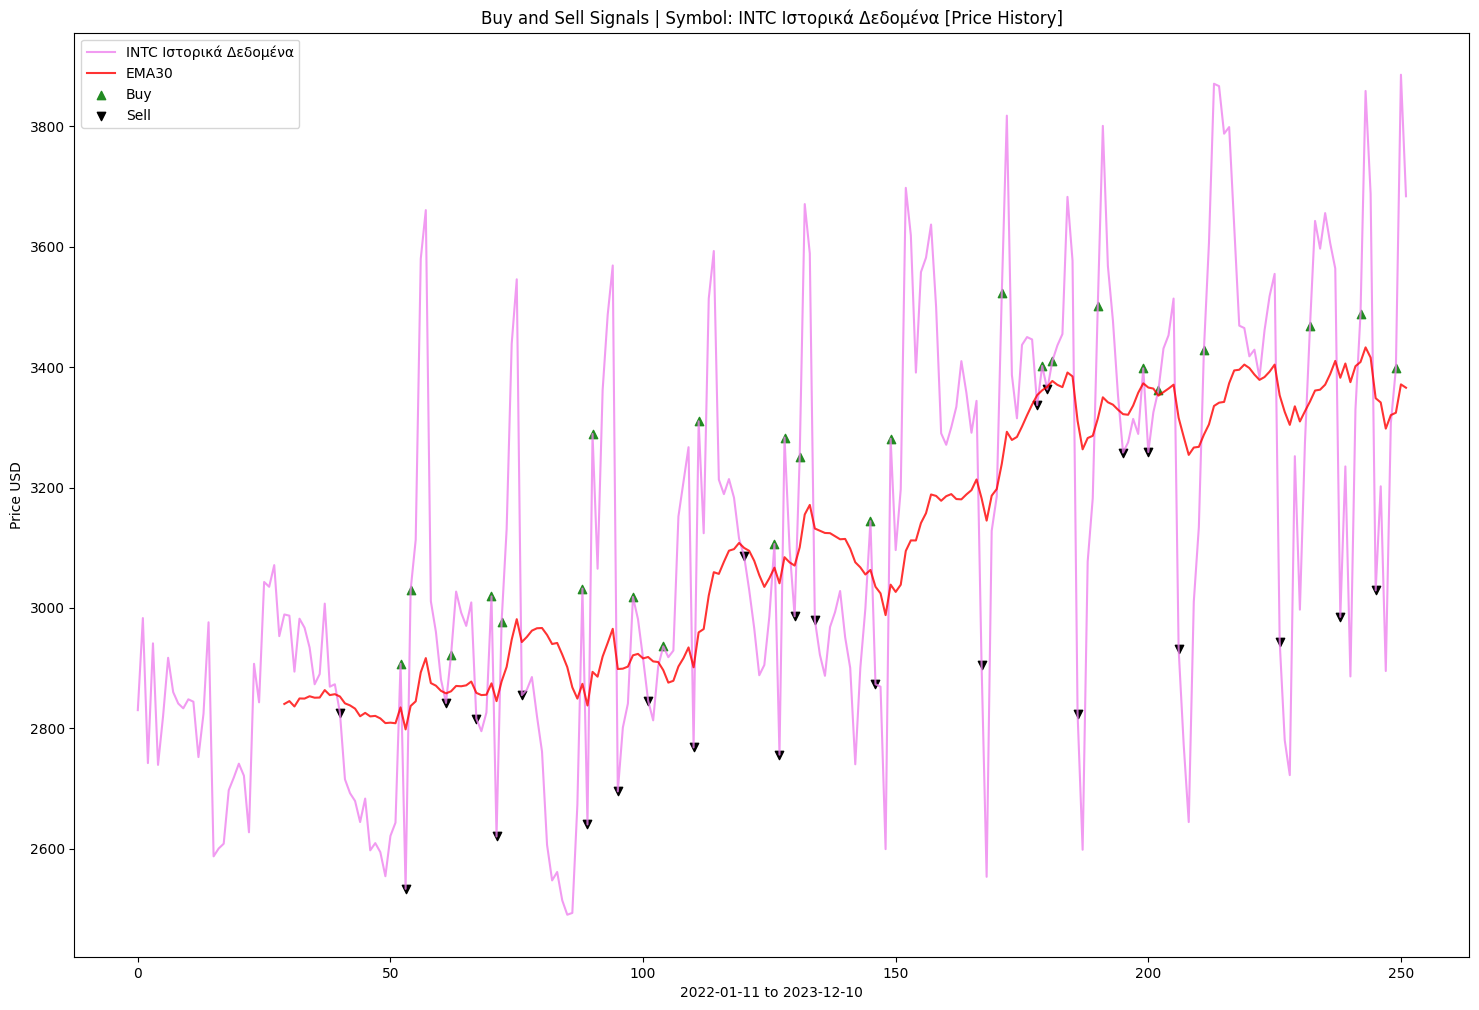

In [27]:
#Βήμα 4 | EMA_A Plot Report: Total Date Signals (Buy or to Sell)
plot_total_signals(EMA_A,EMA_A_total_dates_report)

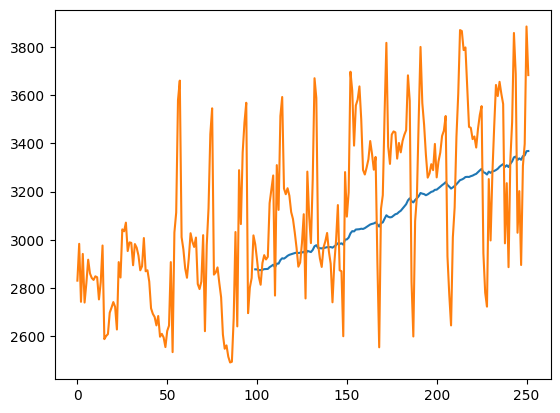

Price_EMA100
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
..            ...
247     3332.1682
248     3347.3466
249     3350.3132
250     3367.8152
251     3368.5478

[252 rows x 1 columns]

In [28]:
#Βήμα 5 | Select EMA Span to calculate (example 2)
span_value = 100
EMA_B = ema_info(dataset, span_value)
EMA_B

In [29]:
#Βήμα 6 | Total Date Signals (Buy or to Sell) EMA_B Report
EMA_B_total_dates_report, EMA_B_signals_dates = signal_buy_sell_report(dataset,EMA_B)
EMA_B_signals_dates

signal_buy_price  signal_sell_price
Date                                           
2023-03-21               NaN             2846.0
2023-03-23            2903.0                NaN
2023-04-01               NaN             2768.0
2023-04-04            3310.0                NaN
2023-04-25               NaN             2888.0
2023-04-27            2986.0                NaN
2023-05-01               NaN             2756.0
2023-05-04            3283.0                NaN
2023-05-16               NaN             2922.0
2023-05-18            2968.0                NaN
2023-05-23               NaN             2951.0
2023-05-30            2999.0                NaN
2023-06-01               NaN             2873.0
2023-06-04            3281.0                NaN
2023-07-02               NaN             2905.0
2023-07-06            3128.0                NaN
2023-08-02               NaN             2824.0
2023-08-06            3182.0                NaN
2023-09-01               NaN             2931.0
2023-09-08            3428.0                NaN
2023-10-01               NaN             2944.0
2023-10-08            3468.0                NaN
2023-11-01               NaN             2985.0
2023-11-07            3330.0                NaN
2023-12-01               NaN             3029.0
2023-12-07            3398.0                NaN

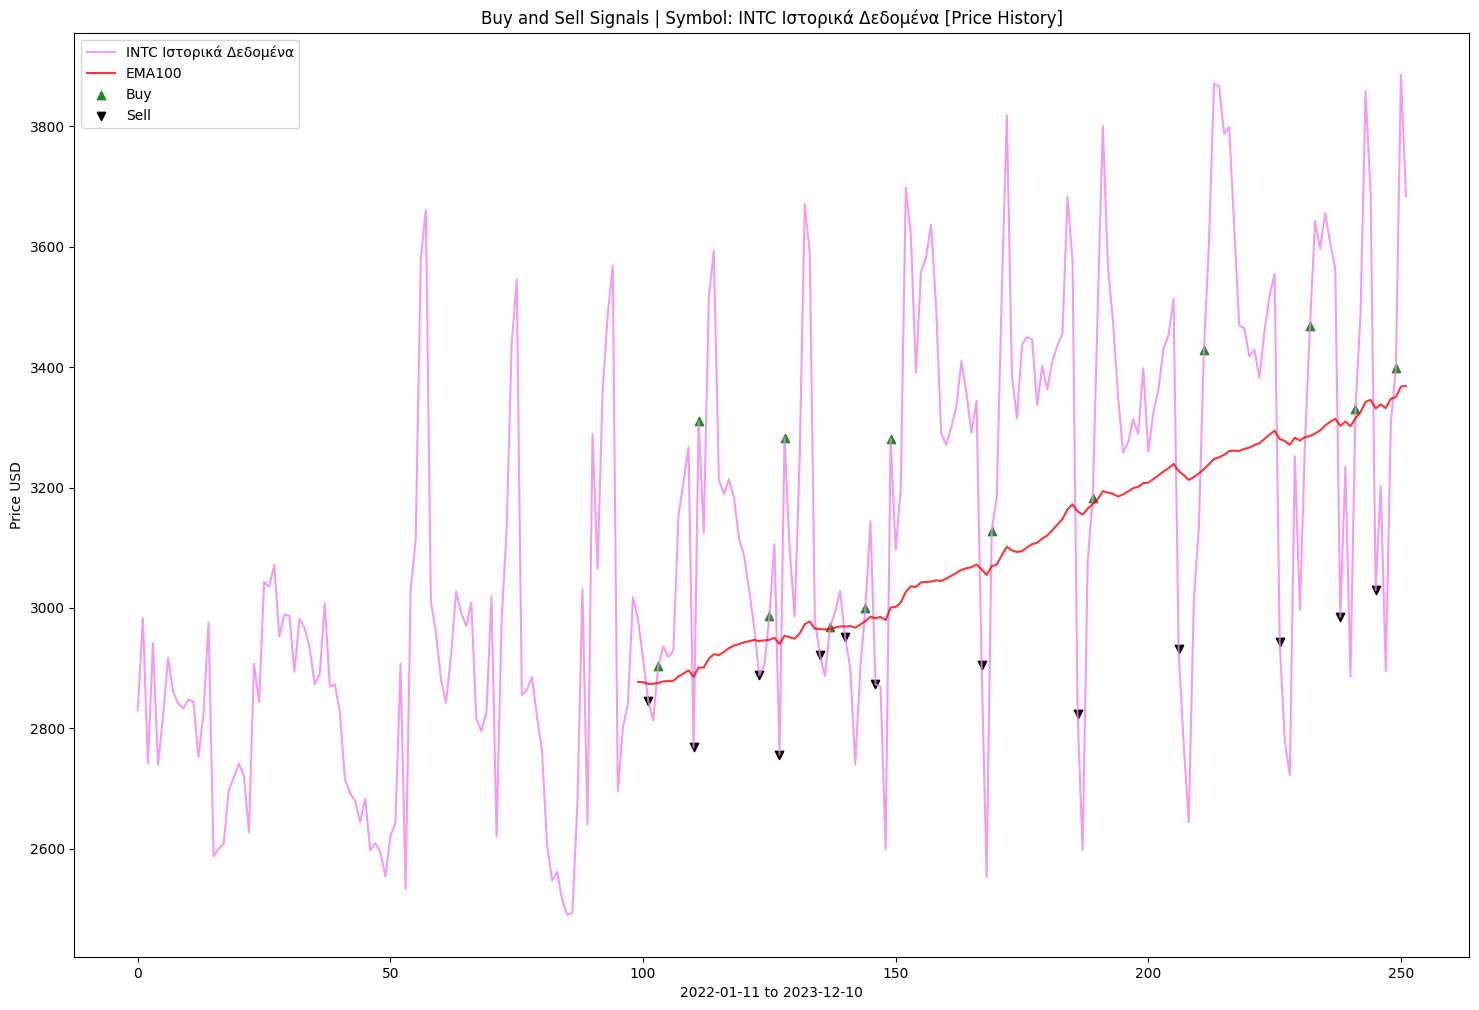

In [30]:
#Βήμα 7 | EMA_B Plot Report: Total Date Signals (Buy or to Sell)
plot_total_signals(EMA_B,EMA_B_total_dates_report)

**05 - Compare Plots (SMA, WMA, EMA)**

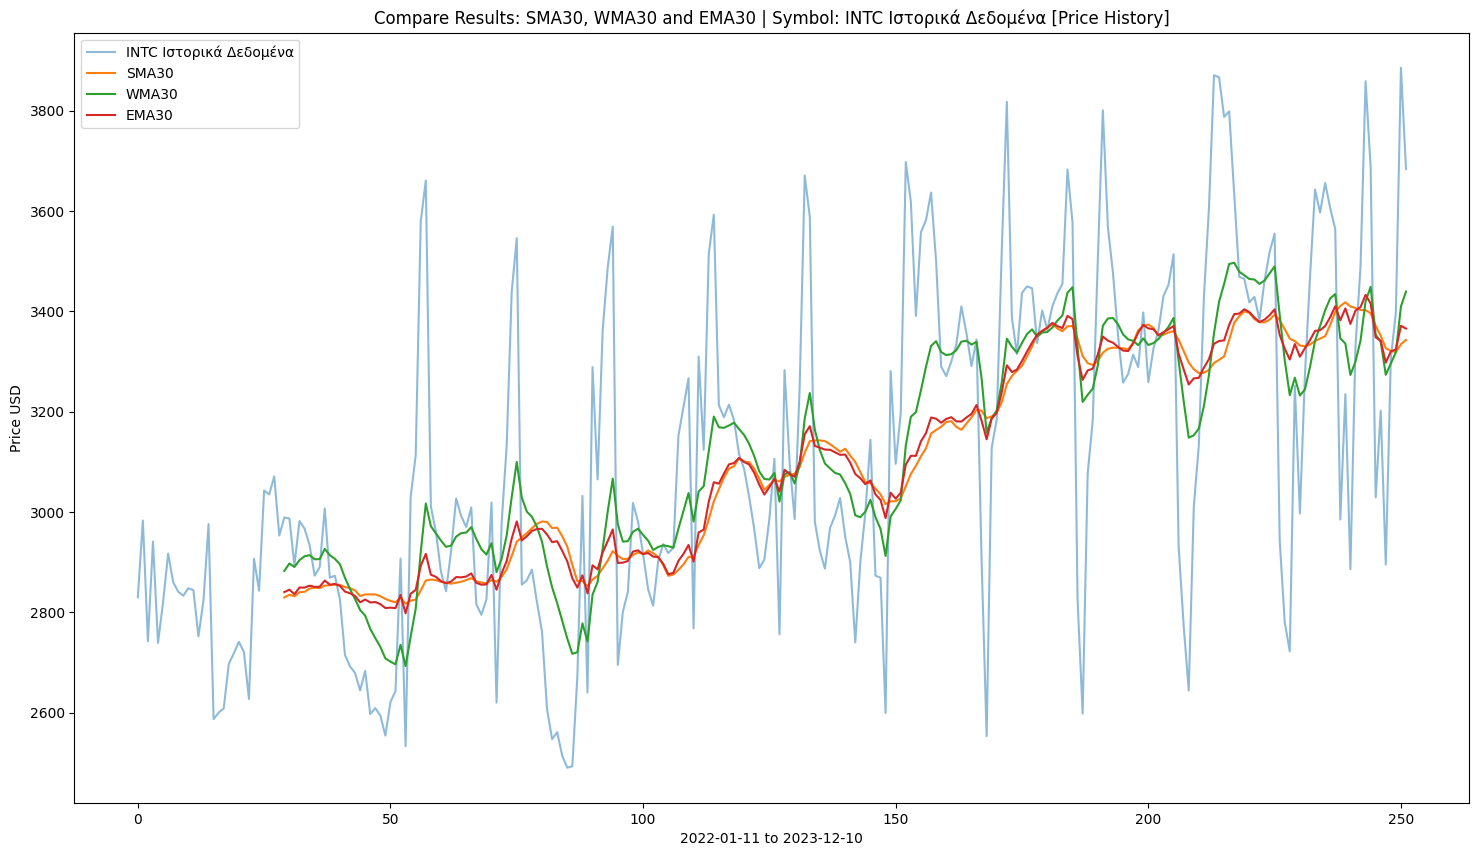

In [31]:
#Βήμα 1 | Compare Plot Values Report
#Όπου SMA_A, WMA_A, EMA_A όπως τα έχουμε ορίσει πιο πριν
values_a = SMA_A
values_b = WMA_A
values_c = EMA_A
plot_compare_report(values_a,values_b,values_c)

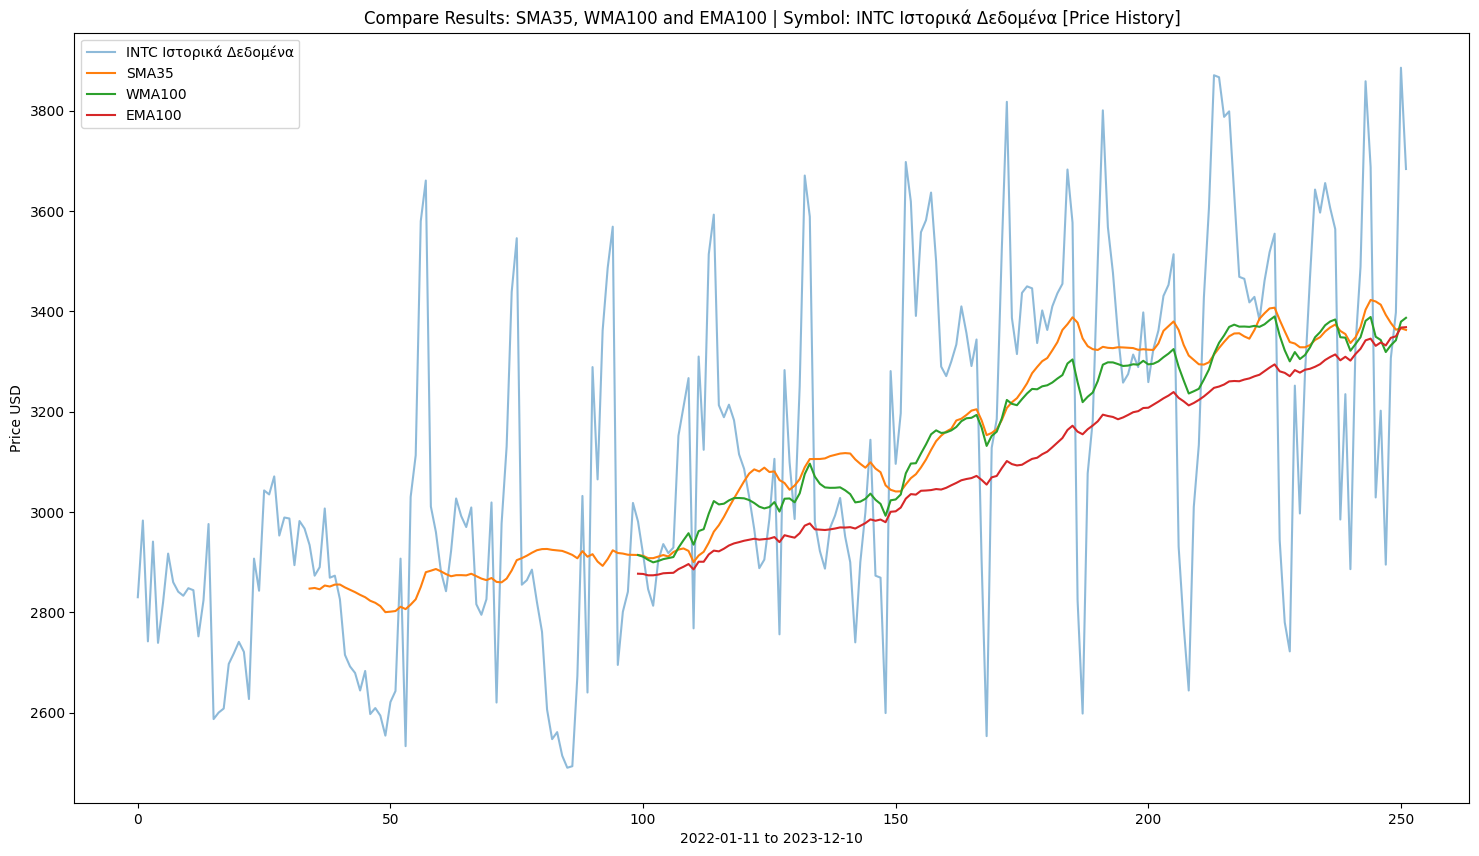

In [32]:
#Βήμα 2 | Compare Plot Values Report
#Όπου SMA_B, WMA_B, EMA_B όπως τα έχουμε ορίσει πιο πριν
values_a = SMA_B
values_b = WMA_B
values_c = EMA_B
plot_compare_report(values_a,values_b,values_c)